### Adam Mischke
### 18 Feb 2018
### CSCI 4850-5850 - Neural Networks
### Homework 3 - Data Visualization with s Principal Component Analysis (PCA)
### Due: Feb. 20 @ 11:00pm

#### Imports:

In [3]:
# for reading data sets from the web
import pandas as pd

# for all the numpy greatness
import numpy as np

# to make plots n stuff
import matplotlib.pyplot as plt
%matplotlib inline

# LaTex and sympy are awesome!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display

# PCA library from sklearn
from sklearn.decomposition import PCA

# keras
import keras

#### Iris data set:

In [5]:
# grab the iris data set
iris_data = np.array(pd.read_table('https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt',
                                   delim_whitespace=True,
                                   header=None))

In [8]:
# feature set
X = iris_data[:,0:4] # 4 first columns: 0,1,2,3

# class labels
Y = iris_data[:,4]   # last column: 4 

# pretty print
display(X.shape)
display(Y.shape)
# how many unique class labes do we have?
display(Matrix(np.unique(Y)).T)

In [9]:
# mean center of a vector
def mean_center(x):
    return x - np.mean(x)

# apply the mean centered function across the features matrix
x_centered = np.apply_along_axis(mean_center,0,X)

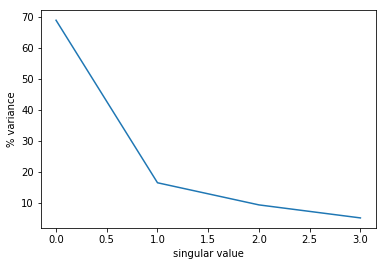

In [11]:
# singular value decompostion (left-singular)
# U = left singular vectors, (unit length)
# S = singular-values
U,S,V = np.linalg.svd(x_centered, full_matrices=True)

# percentage variance accounted for
plt.plot( (100.0 * S) / np.sum(S) )
plt.ylabel('% variance')
plt.xlabel('singular value')
plt.show()

In [18]:
# variance accounted for in the first two principal components
100.0 * ( (S[0] + S[1]) / np.sum(S) )

In [30]:
# create and fill a 2-d matrix (150 rows x 4 columns)
D = np.zeros([X.shape[0], X.shape[1]])

# fill in the values from S into D as a diagonal
np.fill_diagonal(D,S)

# matrix multiply the new D with our unit left singular vectors
x_rotated = np.dot(U,D)

# collect the two principal components (150 rows x 2 columns)
PCs = x_rotated[:,0:2]
PCs.shape

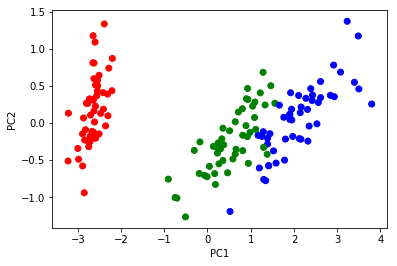

In [34]:
# rgb color vector
rgb = ['red','green','blue']

# create a scatter plot of each row into a 2-D plane
plt.scatter(PCs[:,0], PCs[:,1],
            color = [rgb[i] for i in Y.astype(int)])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [35]:
pca = PCA(2)
# using scikitlearn
PCs = pca.fit_transform(X)[:,0:2]

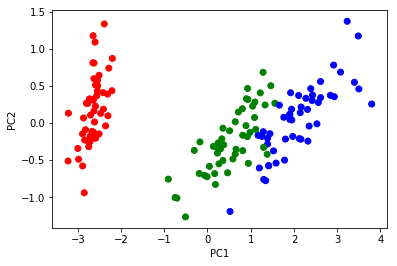

In [36]:
# plot the data!
plt.scatter(PCs[:,0], PCs[:,1],
            color = [rgb[i] for i in Y.astype(int)])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### MNIST data set:

In [38]:
# load the MNIST data set using keras
# shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [55]:
# sub sample some of these, 6,000 out of 60,000
# 28 x 28 pixels in size, with each pixel having an int value of 0 - 255
X = x_train[range(0, x_train.shape[0],10), :, :]
Y = y_train[range(0, y_train.shape[0], 10)]

display(X.shape)
display(Y.shape)
# how many unique class labes do we have?
display(Matrix(np.unique(Y)).T)

In [40]:
# round these values to either on or off
X = X.astype('float32') / 255.0

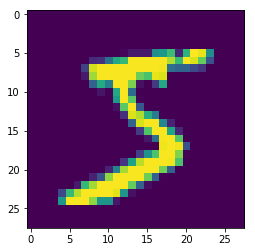

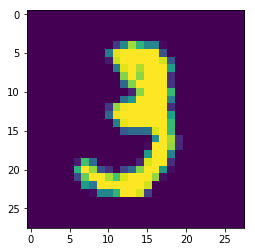

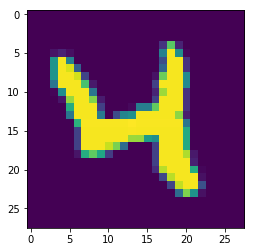

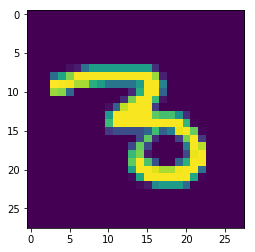

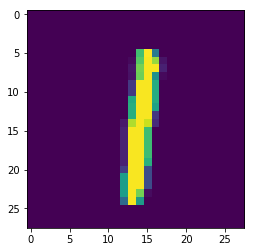

In [41]:
# plot some of the images
for i in range(5):
    plt.figure()
    plt.imshow(X[i, :, :])
plt.show()

In [42]:
display(Matrix(Y[0:5]))
# correct!

In [43]:
# flatten the images to perform principal component analysis
# where each pixel is treated as a single measurement
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
X.shape   # 784 dimensions!!

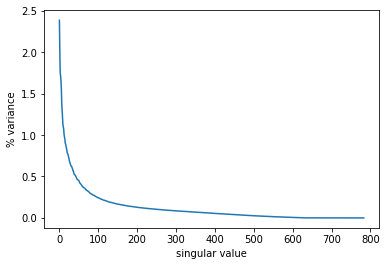

In [45]:
"""
Same deal here,
1. mean-center the features
2. caluclate the SVD
3. examine the singular values
4. scaling the left-singular vectors
5. plotting the 2-D projection

THIS TAKES TIME, BE PATIENT!
"""

# mean-centering
x_centered = np.apply_along_axis(mean_center, 0, X)

# SVD
U,S,V = np.linalg.svd(x_centered, full_matrices=True)

# percent variance accounted for..
plt.plot( 100.0 * S / np.sum(S))
plt.ylabel('% variance')
plt.xlabel('singular value')
plt.show()

In [46]:
# check the variance for the first two principal components ~5%
100.0 * (S[0] + S[1]) / np.sum(S)

In [49]:
# variance accounted for in the first two principal components
display( 100.0 * (np.sum(S[0:340])) / np.sum(S))

# reduction of..43%? which is 340 out of 784 dimensions
display(100 * 340 / len(S))

In [50]:
# create and fill a 2-d matrix (150 rows x 4 columns)
D = np.zeros([X.shape[0], X.shape[1]])

# fill in the values from S into D as a diagonal
np.fill_diagonal(D,S)

# matrix multiply the new D with our unit left singular vectors
x_rotated = np.dot(U,D)

# collect the two principal components (150 rows x 2 columns)
PCs = x_rotated[:,0:2]
PCs.shape

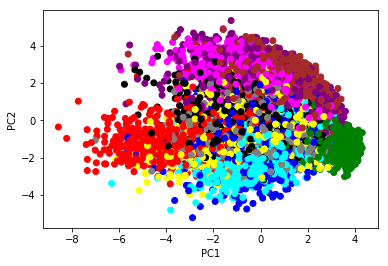

In [51]:
all_the_colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 
                  'black', 'brown', 'grey', 'purple']

# scatter plot our data!
plt.scatter(PCs[:,0], PCs[:,1],
           color = [all_the_colors[i] for i in Y.astype(int)])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()  # 6,000 points! It's too clustered!

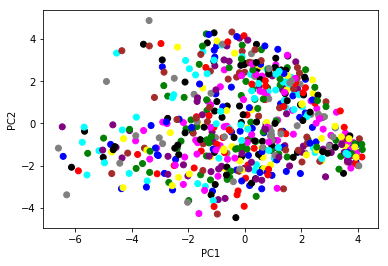

In [54]:
# scatter plot our data!
plt.scatter(PCs[range(0,6000,10),0], PCs[range(0,6000,10),1],
           color = [all_the_colors[i] for i in Y.astype(int)])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()  # this is better, in steps of 10